In [ ]:
# 303 Tips

# Imputing
    # KNNImputer from 303-1 notes
        # Using same k for all columns is fine 
        
# Check with .unique() to see if columns make sense

# Check correlation - Should be able to drop ~200 columns this way

# Start with feature importance models (DecisionTree and MARS)
    # Stick to the predictors with higher importances - select some subsets
    
# Start writing tuning code
    # RF
    # MARS
    # AdaBoost
    # XGBoost
    
# SET UP GOOGLE COLLAB

# Week 8: Ensembles

In [1]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import impute

data = pd.read_csv('train.csv')




#Impute nan using mean of column
# data = data.astype(float)
# data = data.apply(lambda x: x.replace(np.nan, x.mean()))


#Create cluster dummies
from sklearn.cluster import KMeans, DBSCAN
# clusters = KMeans(random_state=0, n_clusters = 10)
# clusters.fit(data)

# pred = clusters.predict(data)
# data['Cluster'] = pred
# data.Cluster = data.Cluster.astype(str)

y = data.y
X = data.drop('y', axis=1)

#Define an object of type KNNImputer
imputer = impute.KNNImputer(n_neighbors=2)
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X = pd.DataFrame(X)




#DBSCAN Cluster Dummies
# db = DBSCAN(eps=0.11, min_samples=2)
# db.fit_predict(X)
# pd.Series(db.labels_).unique()

# data = pd.get_dummies(data)

# features = X.columns



In [351]:
X[[71, 84]]

,71,84
0,-0.283187,-0.283187
1,2.016243,2.016243
2,-0.148804,-0.148804
3,-0.290652,-0.290652
4,-0.245858,-0.245858
...,...,...
5375,-0.305584,-0.305584
5376,-0.290652,-0.290652
5377,-0.186133,-0.186133
5378,-0.298118,-0.298118


## Imputation

29911


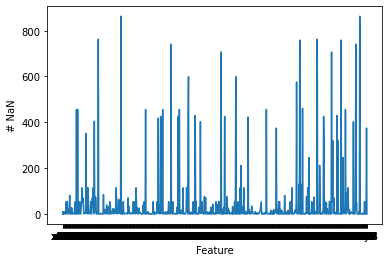

In [250]:
plt.plot(data.isna().sum())
plt.xlabel('Feature')
plt.ylabel('# NaN')
print(data.isna().sum().sum())

## Response Range

In [128]:
data.y.describe()

count    5380.000000
mean        8.630297
std        12.016238
min         1.000000
25%         2.000000
50%         5.000000
75%        10.000000
max       100.000000
Name: y, dtype: float64

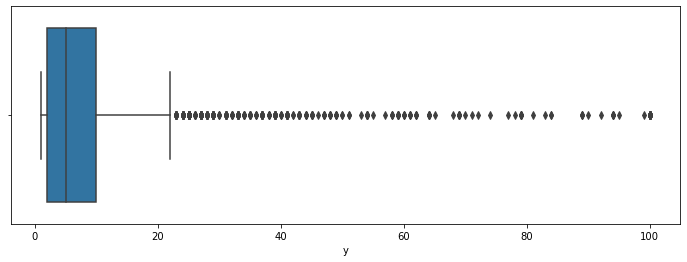

In [97]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data.y)

## Column Value Inspection


In [2]:
X = pd.DataFrame(X)
print(X.shape)

res=[]
for col in X:
     if len(X[col].unique()) == 1:
        res.append(col)
        X = X.drop(col, axis=1)

print('Columns dropped:', len(res))
# 11 columns with only 1 value

print(X.shape)

(5380, 766)
Columns dropped: 11
(5380, 755)


In [ ]:
# Column Variance

In [355]:
## Not working right now - is removing both

# Duplicated columns
duplicated_cols = X.columns[X.transpose().duplicated(keep='first')]
print(len(duplicated_cols))
print(duplicated_cols)

# Drop the duplicated columns
X.drop(duplicated_cols, axis=1, inplace=True)



print(X.shape)

84
Int64Index([ 71,  84, 115, 120, 123, 139, 170, 171, 179, 204, 206, 210, 213,
            214, 224, 230, 237, 277, 278, 279, 285, 297, 313, 339, 340, 351,
            352, 372, 377, 381, 382, 384, 397, 403, 418, 433, 439, 441, 442,
            450, 455, 458, 464, 470, 471, 479, 482, 489, 491, 492, 493, 495,
            539, 544, 546, 547, 550, 565, 573, 592, 593, 608, 613, 615, 618,
            621, 628, 629, 650, 659, 673, 678, 682, 686, 690, 705, 715, 724,
            743, 747, 754, 760, 761, 762],
           dtype='int64')
(5380, 671)


In [341]:
X.T.drop_duplicates(keep='first').T

## Correlation Analysis

In [130]:
# Correlation Analysis
data.corrwith(data.y).sort_values(ascending=False)[:20]

y       1.000000
x146    0.378696
x102    0.378436
x014    0.364737
x581    0.346539
x619    0.344101
x687    0.343842
x696    0.329630
x651    0.329630
x755    0.324916
x756    0.312253
x569    0.311497
x543    0.308728
x749    0.296195
x591    0.293075
x427    0.293073
x561    0.279915
x572    0.273481
x670    0.272551
x239    0.271268
dtype: float64

In [5]:
perfect_corr = (abs(X.corr()) > 0.9)
(perfect_corr.sum().sum() - 755) / 2

7438.0

In [282]:
# Loop to remove perfect correlation?
corr = X.corr()
for col in X:
    
    if (abs(corr) == 1)[col].sum() != 0:
        X = X.drop(col, axis=1)
        corr = X.corr()
    print(col)
        
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


KeyboardInterrupt: 

In [280]:
correlation_matrix = X.corr()
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) == 1:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [281]:
len(correlated_features)

85

In [305]:
X

,0,1,2,3,4,5,6,7,8,9,...,752,753,755,756,757,758,759,763,764,765
0,-1.731729,0.970042,-0.607871,1.643681,0.000475,1.289816,0.292676,-0.579600,-0.611870,-0.277927,...,0.273436,1.042849,-0.434068,2.883547,-0.234542,-0.392860,-0.732620,-0.229378,-0.840457,-0.481940
1,-1.731085,-0.824764,-0.024523,-1.274365,-0.298702,-0.714445,-1.443005,0.958383,-0.100820,0.742777,...,0.273436,-0.472036,-0.725169,-0.587909,0.721319,-0.266476,-0.909240,-0.758149,0.732603,0.589499
2,-1.730441,-0.270383,-0.860578,-0.785989,-0.302801,-0.271412,-1.443005,-0.512567,-0.942621,-0.150327,...,-2.395120,-1.726044,0.556277,0.226333,-0.215916,-0.392868,0.185802,-0.140474,-0.724182,-0.420103
3,-1.729797,-0.640988,0.145935,-0.676105,-0.294604,-0.448604,-1.443005,0.219388,-0.021486,-0.282342,...,0.451340,-0.549334,0.775354,0.043374,-0.240469,-0.379623,-0.308733,-0.532588,0.275700,0.086482
4,-1.729153,-0.300234,-0.891836,1.350656,-0.261818,-0.854257,-0.267221,-0.592294,-0.884315,-0.274604,...,0.629243,-0.351260,-1.103301,-0.844196,-0.236236,-0.392867,-0.803268,0.361564,-0.931817,-0.403455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,1.729153,-0.812404,0.872754,0.386113,-0.282309,-1.072229,0.964553,-0.179059,0.701798,-0.287871,...,0.451340,-0.552094,3.086159,2.418027,-0.240469,-0.392866,-1.015212,-0.668430,0.013487,-0.251241
5376,1.729797,0.892724,0.620776,0.666929,-0.212638,0.060387,0.236687,-0.265314,0.571742,-0.273430,...,1.340858,-0.585222,-0.130962,-0.335444,-0.237929,-0.392870,-1.156508,0.926481,-0.174193,-0.517615
5377,1.730441,-0.369914,0.746220,-0.065635,-0.257719,0.471657,0.516635,-0.373967,0.252984,-0.221833,...,1.162955,1.207106,-0.884225,-0.557575,-0.192210,-0.392871,0.680337,-0.544819,-0.128352,-0.470048
5378,1.731085,-0.053087,-0.713373,1.692519,-0.257719,-0.894028,0.180697,-0.595691,-0.741725,-0.278480,...,-0.793986,-1.035201,0.808365,-0.218646,-0.239622,-0.385486,-0.167437,1.000389,-0.908734,-0.191783


## Feature Importance

## PCA Dimension Reduction

In [157]:
res = pd.DataFrame(columns=['Percent', 'Dim'])
for n in np.arange(0.95, 0, -0.05):
    pca = PCA(n_components = n, svd_solver = 'full')
    pca_data = pca.fit_transform(X)

    dim = pca_data.shape[1]
    res = res.append(pd.DataFrame({'Percent':n, 'Dim':dim}, index=[0]))
    
res = res.reset_index(drop=True)

Text(0, 0.5, 'Dimensions')

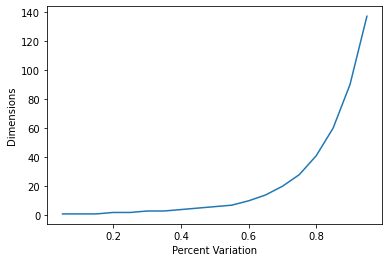

In [162]:
plt.plot(res.Percent, res.Dim)
plt.xlabel('Percent Variation')
plt.ylabel('Dimensions')

In [380]:
pca = PCA(n_components = 0.99, svd_solver = 'full')
pca_data = pca.fit_transform(X)

dim = pca_data.shape[1]
X = pca_data

## DBSCAN

In [231]:
# DBSCAN clustering
db = DBSCAN(eps=50, min_samples=2)
db.fit_predict(X)
db.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [232]:
X = pd.DataFrame(X)
X.Cluster = db.labels_
X = pd.get_dummies(X)
X

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,10.781835,-10.550425,-1.389333,11.412608,-3.948730,0.184892,2.079231,-3.931734,0.882259,-0.292678,...,0.308264,-0.216018,0.046164,-0.064197,-0.052060,1.383777,0.782678,-0.844220,0.596582,-0.697189
1,-13.703336,0.700874,1.600031,-2.889409,5.369754,7.947973,0.806274,-2.257151,-1.315446,-2.476533,...,4.484327,-1.754804,-1.805732,-0.870102,-0.602934,-0.781125,4.719386,0.023884,0.813408,1.291091
2,3.462429,-9.296243,1.776078,-2.945392,0.591712,2.946641,-2.010665,4.974082,-1.538967,-2.179788,...,-0.615271,0.152359,0.110833,0.351977,-0.917847,-0.105817,0.647814,0.202271,-0.120393,0.264436
3,-4.334259,-4.577142,4.333773,-3.305378,-1.062078,-0.305052,2.860698,0.256052,0.939384,-2.921690,...,0.217654,0.908828,-0.440344,-0.598833,0.288496,-1.316715,1.020567,1.088397,0.094585,-0.904364
4,8.380139,-4.903977,-0.674055,-5.754902,4.575190,0.417406,-3.198909,2.866728,-8.067099,3.159759,...,-0.211351,2.108729,-0.738576,1.180693,-0.598859,1.186879,1.795002,-0.179036,0.260185,-1.661345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,-1.301857,-12.441267,6.887888,0.963782,-8.986152,2.616209,0.904449,3.240487,1.895097,-1.648082,...,-1.035582,-0.785636,0.561686,-0.522764,0.655445,-0.246902,-0.684642,1.358684,-0.723941,1.488930
5376,11.180929,-0.771640,6.697330,-3.333841,-0.178603,0.563499,-1.984782,0.664532,0.099215,-1.652088,...,0.414626,-0.474428,-0.698460,-0.351142,-0.151871,0.043417,0.541379,-0.663330,-0.531068,-0.296129
5377,-0.348706,-8.609050,6.310708,0.992539,5.211123,-2.689503,-4.325625,0.290483,-1.422859,0.870810,...,-0.770339,-0.250563,0.919247,-0.606629,1.581885,-0.162867,-0.270071,0.274389,0.385588,0.320263
5378,13.905367,-2.265077,-1.641486,-8.381800,-4.549641,1.352257,-3.287034,-0.714738,2.623186,2.368429,...,-0.132435,1.109315,1.145495,1.482847,-0.486009,-0.134528,-0.146896,0.391888,1.089321,-0.227498


## Lasso Modeling

In [347]:
# Need to select most important variables - Linear predictor Lasso
# lasso = Lasso(alpha=0.11)
lasso = Lasso(alpha=0.11)
lasso.fit(X, y)

Lasso(alpha=0.11)

In [176]:
nonzero_ind = np.nonzero(lasso.coef_)[0]

# selected_features = features[nonzero_ind]
nonzero_coef = lasso.coef_[nonzero_ind]

In [177]:
#Lasso selected linear features
# selected_features

Index(['id', 'x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008',
       'x010', 'x011', 'x012', 'x013', 'x014', 'x015', 'x016', 'x017', 'x018',
       'x019', 'x020', 'x022', 'x023', 'x024', 'x025', 'x026', 'x028', 'x029',
       'x030', 'x031', 'x032', 'x033', 'x034', 'x035', 'x037', 'x038', 'x039',
       'x040', 'x041', 'x042', 'x043', 'x044', 'x045', 'x046', 'x047', 'x049',
       'x050', 'x051', 'x052', 'x053', 'x054', 'x055', 'x056', 'x057', 'x059',
       'x060', 'x061', 'x062', 'x063', 'x064', 'x065', 'x066', 'x068', 'x069',
       'x070', 'x072', 'x074', 'x075', 'x076', 'x077', 'x078', 'x079', 'x080',
       'x081', 'x082', 'x083', 'x084', 'x085', 'x086', 'x087', 'x088'],
      dtype='object')

In [178]:
nonzero_coef

array([ 0.13662938, -0.24069895,  0.03135911,  0.07127578,  0.53904616,
        0.21582039, -0.03538246,  0.14298711,  0.55821514,  0.26849122,
       -0.15975352, -0.32526434,  0.37069091,  0.01784221,  0.06897231,
        0.23571344, -0.19638944,  0.25757013, -0.7547586 ,  0.14976686,
        0.07914227, -0.55835625,  0.02985205, -0.33122338,  0.12948942,
       -0.02667539,  0.15670443,  0.08253534,  0.0798298 , -0.06321887,
       -0.43317627, -0.11447217,  0.17042492,  0.04962899,  0.27529419,
        0.063121  , -0.38986309,  0.16128502, -0.09491997, -0.11636022,
        0.13923714, -0.16533383, -0.08092944,  0.13290083, -0.10062672,
        0.0592198 ,  0.31775034,  0.10386446,  0.25657445,  0.00966455,
       -0.06513703,  0.29740361, -0.24828497, -0.53740329,  0.30947991,
       -0.28586868, -0.34699281,  0.11053246, -0.25004952,  0.07621768,
        0.11086342, -0.35543889, -0.65790683,  0.01985711,  0.26121929,
        0.12529914,  0.30107462, -0.07157384, -0.02099639, -0.04

In [174]:
dfselected = pd.DataFrame({'Feature':selected_features, 'Coef':nonzero_coef})
dfselected.sort_values('Coef', ascending=False)

,Feature,Coef
8,x008,0.558215
4,x004,0.539046
72,x081,0.481182
77,x086,0.395426
12,x013,0.370691
...,...,...
30,x033,-0.433176
53,x059,-0.537403
21,x023,-0.558356
62,x069,-0.657907


In [179]:
# Training on linear lasso regression
train_pred = lasso.predict(X)
train_rmse = np.sqrt(mean_squared_error(y, train_pred))
train_rmse

9.99099033685015

## Feature Importance

In [381]:
from sklearn.tree import DecisionTreeRegressor
X = pd.DataFrame(X)
features = X.columns

#Defining the object to build a regression tree
model = DecisionTreeRegressor(random_state=1, max_depth=10) 

#Fitting the regression tree to the data
model.fit(X, y)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [393]:
# model.feature_importances_
# pd.concat(features, model.feature_importances_)
dfimportances = pd.DataFrame({'Feature':features, 'Importance':model.feature_importances_})
dfimportances = dfimportances.sort_values('Importance', ascending=False)
nonzero = dfimportances[dfimportances['Importance'] != 0]
selected = X.loc[:, nonzero['Feature']]

X = selected
X

,4,1,8,96,76,13,214,130,171,5,...,53,48,106,144,2,166,15,196,209,189
0,-3.229701,-10.460085,1.108743,1.227952,0.153702,-2.328664,-0.189060,-0.552939,0.339214,0.151877,...,0.373527,0.030857,0.418781,0.870020,-1.580759,0.127370,3.428950,0.422128,0.283325,0.466091
1,5.398763,0.684339,-1.028965,0.687219,-2.263689,0.515448,0.253642,-1.026925,-0.776601,8.014677,...,-0.226533,2.493548,-0.907385,-0.380115,1.692382,0.737204,-4.280835,-0.373835,-0.229207,0.040355
2,0.621802,-9.234734,-1.895984,1.495823,-0.134505,0.070630,-0.168463,0.570945,0.068424,2.912612,...,-1.693963,-0.282459,-1.151994,0.488113,1.853144,0.001610,0.148584,0.931429,-0.316346,-0.057581
3,-1.174213,-4.534826,0.911036,0.110587,-0.654074,-0.449855,-0.152912,0.363525,0.084084,-0.272781,...,0.309112,-0.512183,-0.473482,-0.315591,4.384519,0.160152,-1.479988,0.413707,-0.413282,-0.023283
4,4.425239,-4.861344,-8.289460,-1.030169,-0.649269,-2.593752,-0.647746,0.859201,0.326226,0.404138,...,-1.348199,0.741722,-1.171484,-0.013650,-0.534967,0.125722,-0.839008,-0.206477,0.154552,-0.200334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,-9.092129,-12.554508,1.607166,-1.647155,0.445460,-0.793566,0.895262,-0.841892,0.361482,2.565508,...,-1.830488,1.044994,0.452804,-0.162050,6.788440,-0.042502,-2.166553,0.444438,-0.270494,0.617612
5376,-0.324999,-0.718788,-0.008629,-0.174980,-0.833624,2.064602,0.010221,-0.679126,-0.815688,0.563165,...,-0.365784,0.468868,0.713477,-1.031705,6.740806,-0.120134,-0.077532,0.142788,0.079218,0.268863
5377,5.234155,-8.517953,-1.545422,-1.806651,0.895211,1.846169,0.708303,0.108522,-1.040470,-2.691668,...,0.936631,1.440036,1.535610,-1.260288,6.409704,-0.101222,-0.358482,-0.270757,0.304382,0.151912
5378,-4.778968,-2.242721,2.587226,-0.112792,1.228117,-1.216839,-0.153840,0.089546,0.128397,1.408936,...,1.634457,0.934574,-0.462049,0.583022,-1.551466,-0.496518,2.979448,-0.176745,-0.006118,0.349655


In [401]:
plt.bar(abs(selected.corrwith(y)))


TypeError: bar() missing 1 required positional argument: 'height'

In [374]:
pred = model.predict(X)
train_rmse = np.sqrt(mean_squared_error(y, pred))
train_rmse

#Severe Overfitting

7.139848245274117

## Visualization

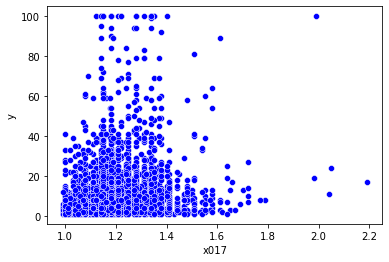

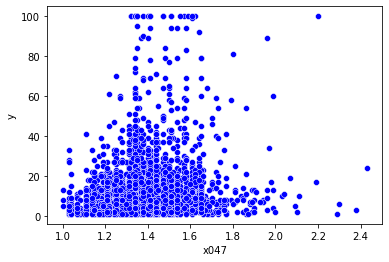

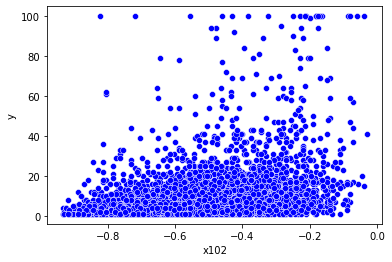

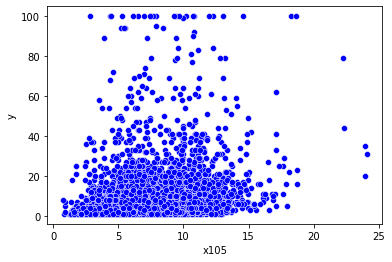

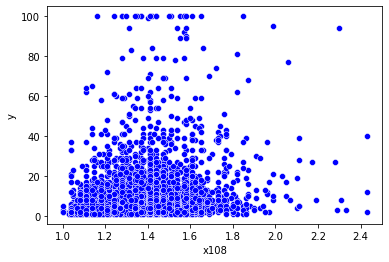

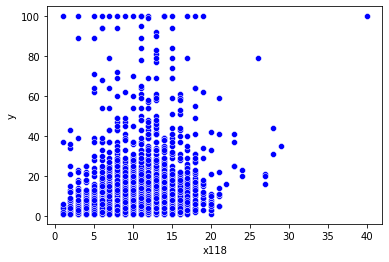

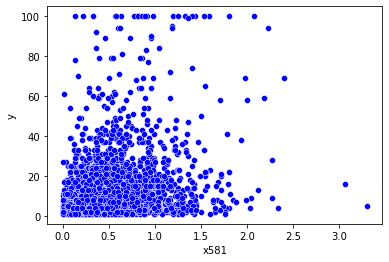

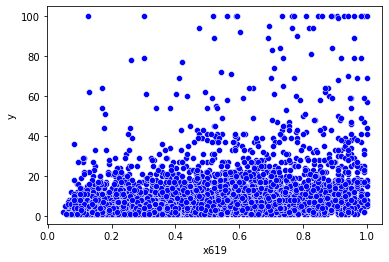

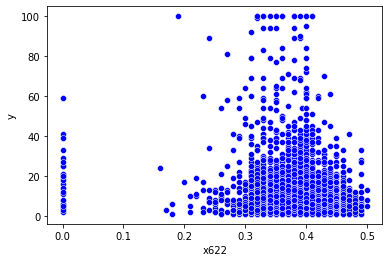

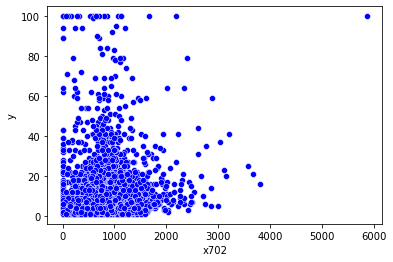

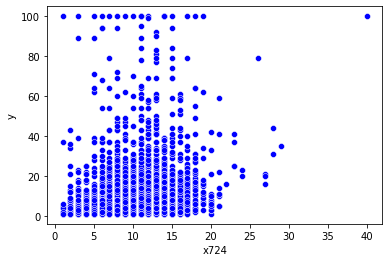

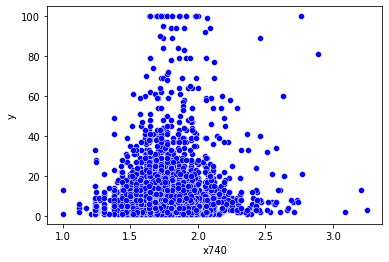

In [75]:
# Next steps:
# stepwise selection
# Visualization
# Non-linear Analysis
# lasso_X = data[['x017', 'x047', 'x102', 'x105', 'x108', 'x118', 'x581', 'x619', 'x622','x702', 'x724', 'x740']]
# for col in lasso_X:
#     sns.scatterplot(x = data[col], y=data['y'], color = 'blue')
#     plt.show()

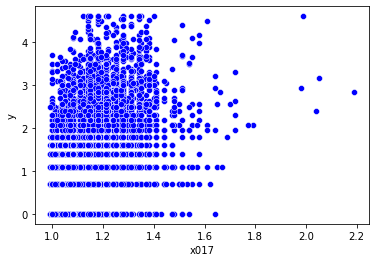

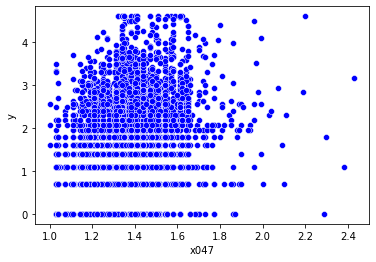

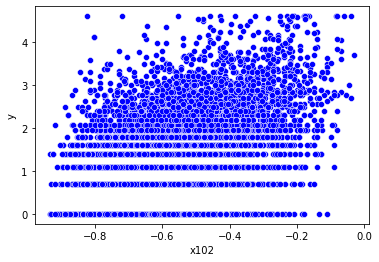

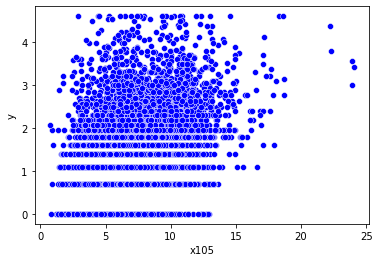

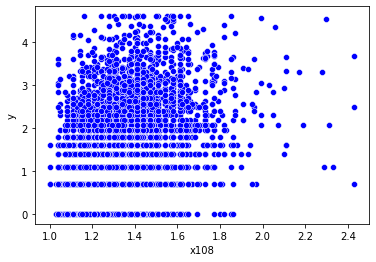

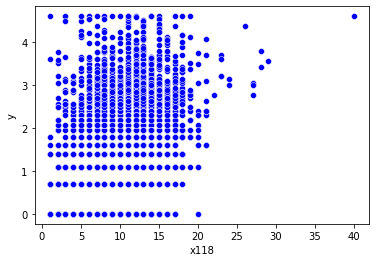

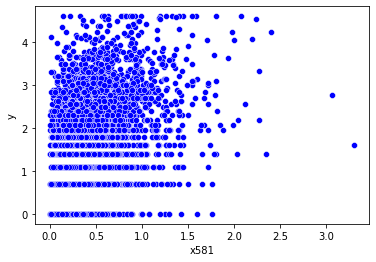

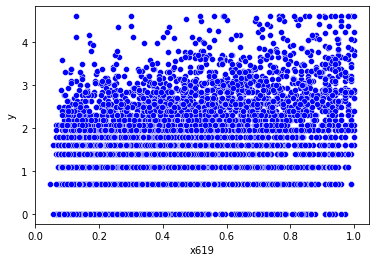

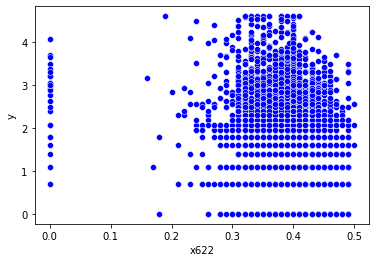

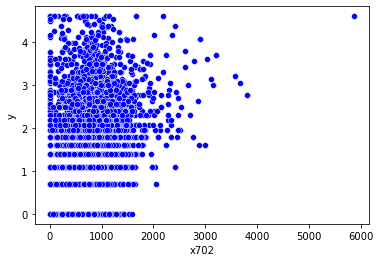

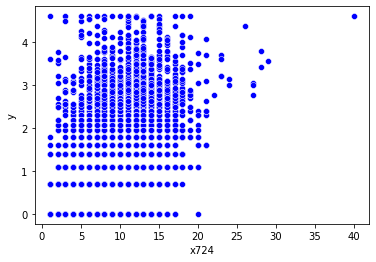

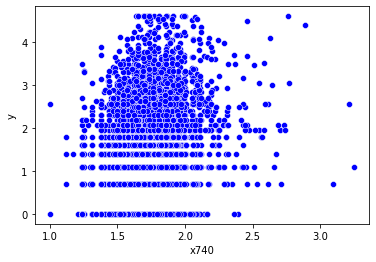

In [76]:
for col in lasso_X:
    sns.scatterplot(x = data[col], y=np.log(data['y']), color = 'blue')
    plt.show()

,x017,x047,x102,x105,x108,x118,x581,x619,x622,x702,x724,x740
x017,True,True,False,False,False,False,False,False,False,False,False,True
x047,True,True,False,False,False,False,False,False,False,False,False,True
x102,False,False,True,False,False,False,False,True,False,False,False,False
x105,False,False,False,True,False,True,False,False,False,False,True,False
x108,False,False,False,False,True,False,False,False,False,False,False,False
x118,False,False,False,True,False,True,False,False,False,False,True,False
x581,False,False,False,False,False,False,True,False,False,False,False,False
x619,False,False,True,False,False,False,False,True,False,False,False,False
x622,False,False,False,False,False,False,False,False,True,False,False,False
x702,False,False,False,False,False,False,False,False,False,True,False,False


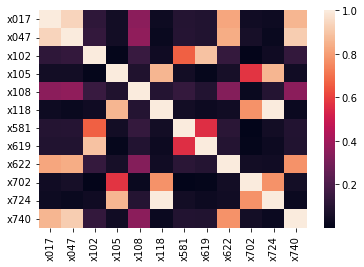

In [77]:
sns.heatmap(abs(lasso_X.corr()))

# High correlation between:
    # x740, x017
    # x047, x740
    # x017, x047
    
    # x619, x102
    # x724, x105
    # x724, x118
    # x118, x105
    
abs(lasso_X.corr() > 0.8)

In [201]:
#Create interaction columns
    # x740, x017
    # x047, x740
    # x017, x047
    
    # x619, x102
    # x724, x105
    # x724, x118
    # x118, x105
    
data = pd.read_csv('train.csv')
data = data.fillna(0)

data['x740*x017*x047'] = data['x740'] * data['x017'] * data['x047']

data['x619*x102'] = data['x619'] * data['x102']
data['x724*x105'] = data['x724'] * data['x105']
data['x724*x118'] = data['x724'] * data['x118']
data['x118*x105'] = data['x118'] * data['x105']

In [202]:
y = data.y
X = data.drop('y', axis=1)
features = X.columns

X = scaler.fit_transform(X)
lasso = Lasso(alpha=0.11)
lasso.fit(X, y)

nonzero_ind = np.nonzero(lasso.coef_)[0]

selected_features = features[nonzero_ind]
nonzero_coef = lasso.coef_[nonzero_ind]
nonzero_coef

array([ 3.57147232e-01, -1.74272958e-02,  1.63160120e-04,  5.93559754e-01,
        2.16107249e+00, -1.19624979e-01, -5.27694121e-01,  6.72185430e-02,
        5.61317114e-02,  1.60139201e-01,  2.28377852e-02, -5.68152291e-02,
        7.43350644e-02,  4.99347938e-02, -1.94458386e-01,  1.26936850e+00,
       -5.57766059e-02, -7.15660471e-01,  1.12209666e+00,  4.65973507e-02,
        3.31173052e-01, -2.40399175e-01, -5.83943508e-01, -1.63136671e-02,
       -3.18880966e-02, -5.51914950e-01,  2.61893743e-01,  1.21944767e+00,
        1.07165052e-01])

In [203]:
selected_features

Index(['x014', 'x027', 'x105', 'x108', 'x146', 'x186', 'x250', 'x286', 'x365',
       'x369', 'x427', 'x454', 'x477', 'x487', 'x506', 'x561', 'x563', 'x567',
       'x581', 'x591', 'x619', 'x620', 'x622', 'x632', 'x685', 'x750',
       'x740*x017*x047', 'x724*x105', 'x118*x105'],
      dtype='object')

In [204]:
train_pred = lasso.predict(X)
train_rmse = np.sqrt(mean_squared_error(y, train_pred))
train_rmse

10.127981328743388

## Test Predictions

In [375]:
# Test Predictions
data = pd.read_csv('test.csv')
id = data.id

# data = data.astype(float)
# data = data.apply(lambda x: x.replace(np.nan, x.mean()))

imputer = impute.KNNImputer(n_neighbors=2)
data = imputer.fit_transform(data)

# clusters = KMeans(random_state=0, n_clusters = 10)
# clusters.fit(data)

# pred = clusters.predict(data)
# data['Cluster'] = pred
# data.Cluster = data.Cluster.astype(str)

# data['x740*x017*x047'] = data['x740'] * data['x017'] * data['x047']

# data['x619*x102'] = data['x619'] * data['x102']
# data['x724*x105'] = data['x724'] * data['x105']
# data['x724*x118'] = data['x724'] * data['x118']
# data['x118*x105'] = data['x118'] * data['x105']

data = scaler.transform(data)
data = pca.transform(data)

# ???
# db.predict(data)
# data = pd.DataFrame(data)
# data.Cluster = db.labels_

# data = pd.get_dummies(data)

# test_pred = lasso.predict(data)
test_pred = model.predict(data)
test_pred

array([ 5.45669291,  6.71232877,  4.34237996, ...,  7.17613636,
       16.53846154,  7.58445946])

In [376]:
output = pd.DataFrame()
output['id'] = id
output['y'] = test_pred

output

,id,y
0,5380,5.456693
1,5381,6.712329
2,5382,4.342380
3,5383,4.342380
4,5384,79.000000
...,...,...
4398,9778,4.083591
4399,9779,7.176136
4400,9780,7.176136
4401,9781,16.538462


In [377]:
output = output.set_index('id')
output.to_csv('submission12.csv')

In [47]:
# Cross validate?= to find optimal alpha
np.warnings.filterwarnings('ignore')
scores = []

for a in np.arange(0,1.01,0.01):
    lasso = Lasso(alpha=a)
    score = cross_val_score(lasso, X, y, cv=5, scoring = 'neg_mean_squared_error').mean()
    
    scores.append(score)

scores

KeyboardInterrupt: 

In [41]:
scores.argmax()

TypeError: 'float' object cannot be interpreted as an integer

## Clustering

In [93]:
from sklearn.cluster import KMeans
clusters = KMeans(random_state=0, n_clusters = 10)
clusters.fit(data)

pred = clusters.predict(data)
data['Cluster'] = pred

pd.Series(pred).value_counts()

0    4118
8     542
6     332
3     207
5      95
1      46
4      22
9      13
2       3
7       2
dtype: int64

In [92]:
data

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x758,x759,x760,x761,x762,x763,x764,x765,y,Cluster
0,0.0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,2.972810e+08,0.13,5.0,5.0,2.0,8.5127,14.28,-0.750000,5.0,6
1,1.0,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,3.320000e+12,0.08,661.0,0.0,350.0,1.5700,160.12,0.947097,1.0,0
2,2.0,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,1.004748e+08,0.39,39.0,2.0,18.0,9.6800,25.06,-0.490000,11.0,0
3,3.0,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,3.480000e+11,0.25,2.0,1.0,0.0,4.5316,117.76,1.640000,1.0,0
4,4.0,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,1.095466e+08,0.11,11.0,1.0,3.0,16.2717,5.81,-0.420000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375.0,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,1.586033e+08,0.05,0.0,0.0,0.0,2.7480,93.45,0.220000,4.0,0
5376,5376.0,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,3.608917e+07,0.01,6.0,4.0,4.0,23.6890,76.05,-0.900000,8.0,0
5377,5377.0,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,1.786891e+06,0.53,44.0,0.0,28.0,4.3710,80.30,-0.700000,21.0,0
5378,5378.0,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,1.940000e+11,0.29,3.0,2.0,2.0,24.6594,7.95,0.470000,13.0,0


In [110]:
# More general clusters?
# DBSCAN?
data

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x758,x759,x760,x761,x762,x763,x764,x765,y,Cluster
0,0.0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,2.972810e+08,0.13,5.0,5.0,2.0,8.5127,14.28,-0.750000,5.0,6
1,1.0,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,3.320000e+12,0.08,661.0,0.0,350.0,1.5700,160.12,0.947097,1.0,0
2,2.0,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,1.004748e+08,0.39,39.0,2.0,18.0,9.6800,25.06,-0.490000,11.0,0
3,3.0,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,3.480000e+11,0.25,2.0,1.0,0.0,4.5316,117.76,1.640000,1.0,0
4,4.0,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,1.095466e+08,0.11,11.0,1.0,3.0,16.2717,5.81,-0.420000,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375.0,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,1.586033e+08,0.05,0.0,0.0,0.0,2.7480,93.45,0.220000,4.0,0
5376,5376.0,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,3.608917e+07,0.01,6.0,4.0,4.0,23.6890,76.05,-0.900000,8.0,0
5377,5377.0,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,1.786891e+06,0.53,44.0,0.0,28.0,4.3710,80.30,-0.700000,21.0,0
5378,5378.0,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,1.940000e+11,0.29,3.0,2.0,2.0,24.6594,7.95,0.470000,13.0,0


In [111]:
data = pd.get_dummies(data)

In [136]:
data

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9
0,0.0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0,0,0,0,0,0,1,0,0,0
1,1.0,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,1,0,0,0,0,0,0,0,0,0
3,3.0,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,1,0,0,0,0,0,0,0,0,0
4,4.0,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375.0,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,1,0,0,0,0,0,0,0,0,0
5376,5376.0,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,1,0,0,0,0,0,0,0,0,0
5377,5377.0,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,1,0,0,0,0,0,0,0,0,0
5378,5378.0,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,1,0,0,0,0,0,0,0,0,0


In [184]:
# We have cluster dummy columns - not selected by lasso

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,5380,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,...,0.0380,0.0010,90204869909,0.26,8.0,5,5.0,30.1213,27.95,-0.49
1,5381,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,...,0.1866,0.0192,37449565014,0.02,16.0,1,8.0,2.1282,10.18,0.55
2,5382,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,...,0.0100,0.0017,10847937619,0.83,35.0,1,19.0,7.8513,21.27,19.09
3,5383,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,...,0.4636,0.0000,37200096,0.51,1.0,4,0.0,9.0511,18.38,4.11
4,5384,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,...,2.8737,0.0001,16400000000000,0.12,2.0,1,2.0,2.6512,149.68,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,9778,3.217682e+09,2214.42,5.27,0.00010,1.608841e+09,0.00,520766.78,172141.0,1307.0,...,0.0771,0.0095,31446931515,0.74,0.0,0,0.0,1.6431,22.42,NaN
4399,9779,3.042820e+10,14279.29,6.18,0.00135,1.901762e+09,0.33,1634334.25,1420919.0,826.0,...,0.2828,0.0000,18200000000000,0.42,0.0,2,0.0,12.3538,68.09,-0.43
4400,9780,8.556628e+09,7518.26,6.74,0.00005,2.852209e+09,0.00,559939.70,911940.0,105542.0,...,0.2890,0.0010,551000000000,0.67,25.0,1,9.0,2.5226,29.27,0.32
4401,9781,7.384902e+10,2556.73,6.47,0.00140,1.605414e+09,0.25,186175.29,236336.0,655488.0,...,0.5227,0.0127,20500000000000,0.67,142.0,6,56.0,32.7632,10.22,-0.75


In [372]:
dim

227